In [1]:
import control as co
import matplotlib.pyplot as plt
import numpy as np
from identify_it import IdentifyIt


Running method...
VIM is runing...


0.43553883819486683

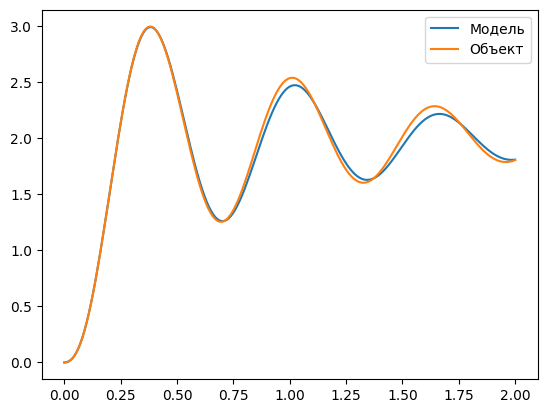

In [9]:
file_path = "test_data/data_for_real.csv"
degree = 3
x, y = np.loadtxt(file_path, delimiter=',', unpack=True)
ident = IdentifyIt(x=x, y=y, degree=3, method=2)
plt.plot(ident.x, ident.y_m, label="Модель")
plt.plot(x, y, label="Объект")
plt.legend()
ident.error